In [390]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
# 定义模型参数
k_12 = 105/740  # 第一个箱子到第二个箱子的传输系数
k_21 = 102/900  # 第二个箱子到第一个箱子的传输系数
R=pd.read_csv('global_1751_2015.csv')
data = []
# 打开CSV文件
with open('global_1751_2015.csv', 'r') as file:
    # 创建CSV阅读器对象
    csv_reader = csv.reader(file)
    # 跳过前241行
    for _ in range(241):
        next(csv_reader)

    # 读取并打印第242行到第259行
    for i in range(242, 260):
        R = next(csv_reader)
        data.append(R)
data
R=pd.read_csv('global_1751_2015.csv')
data1 = []
# 打开CSV文件
with open('co2_annmean_mlo.csv', 'r') as file:
    # 创建CSV阅读器对象
    csv_reader = csv.reader(file)
    # 跳过前241行
    for _ in range(72):
        next(csv_reader)

    # 读取并打印第242行到第259行
    for i in range(73, 91):
        R = next(csv_reader)
        data1.append(R)
data1

[['1987', '349.31', '0.12'],
 ['1988', '351.69', '0.12'],
 ['1989', '353.2', '0.12'],
 ['1990', '354.45', '0.12'],
 ['1991', '355.7', '0.12'],
 ['1992', '356.54', '0.12'],
 ['1993', '357.21', '0.12'],
 ['1994', '358.96', '0.12'],
 ['1995', '360.97', '0.12'],
 ['1996', '362.74', '0.12'],
 ['1997', '363.88', '0.12'],
 ['1998', '366.84', '0.12'],
 ['1999', '368.54', '0.12'],
 ['2000', '369.71', '0.12'],
 ['2001', '371.32', '0.12'],
 ['2002', '373.45', '0.12'],
 ['2003', '375.98', '0.12'],
 ['2004', '377.7', '0.12']]

In [391]:
data = pd.DataFrame(data, columns=['Year', 'fossil_fuel', 'Column2', 'Column3','Column4', 'Column5', 'Column6','Column7'])
data
data1 = pd.DataFrame(data1, columns=['Year', 'cloumn1','cloumn2'])
data1

,Year,cloumn1,cloumn2
0,1987,349.31,0.12
1,1988,351.69,0.12
2,1989,353.2,0.12
3,1990,354.45,0.12
4,1991,355.7,0.12
5,1992,356.54,0.12
6,1993,357.21,0.12
7,1994,358.96,0.12
8,1995,360.97,0.12
9,1996,362.74,0.12


In [392]:

r=data['fossil_fuel'].astype(float)
r
r1=data1['cloumn1'].astype(float)
r1

0     349.31
1     351.69
2     353.20
3     354.45
4     355.70
5     356.54
6     357.21
7     358.96
8     360.97
9     362.74
10    363.88
11    366.84
12    368.54
13    369.71
14    371.32
15    373.45
16    375.98
17    377.70
Name: cloumn1, dtype: float64

In [393]:
# 定义时间步长和模型运行的时间范围
dt = 1  # 时间步长
years = np.arange(1987, 2005, dt)
n_steps = len(years)

# 初始化模型变量
N1 = np.zeros(n_steps)
N2 = np.zeros(n_steps)

# 设置初始条件
N1[0] = 740/2.13  # 初始第一个箱子的CO2水平，单位 ppm
N2[0] = 900/2.13  # 初始第二个箱子的CO2水平，单位 ppm

# 模型运行
for t in range(1, n_steps):
    dC1 = ( -k_12 * N1[t-1] +k_21*N2[t-1]+int(r[t-1])/1000/2.13) * dt
    dC2 = ( k_12 * N1[t-1] -k_21*N2[t-1]) * dt

    N1[t] = N1[t-1] + dC1
    N2[t] = N2[t-1] + dC2



In [394]:
# 定义时间步长和模型运行的时间范围
dt = 1  # 时间步长
years = np.arange(1987, 2005, dt)
n_steps = len(years)

# 初始化模型变量
C1 = np.zeros(n_steps)
C2 = np.zeros(n_steps)

# 设置初始条件
C1[0] = 740/2.13  # 初始第一个箱子的CO2水平，单位 ppm
C2[0] = 900/2.13  # 初始第二个箱子的CO2水平，单位 ppm
C2O=821/2.13
# 模型运行
for t in range(1, n_steps):
    yibuxinlo=3.69+1.86*(10**(-2))*C1[t-1]-1.8*(10**(-6))*(C1[t-1]**2)
    dC1 = ( -k_12 * C1[t-1] +k_21*(C2O+yibuxinlo*(C2[t-1]-C2O))+int(r[t-1])/1000/2.13) * dt
    dC2 = ( k_12 * C1[t-1] -k_21*(C2O+yibuxinlo*(C2[t-1]-C2O))) * dt

    C1[t] = C1[t-1] + dC1
    C2[t] = C2[t-1] + dC2
print(C1)

[347.41784038 386.25374031 379.04938696 384.78388469 386.36945045
 389.30894227 391.78711292 394.40980805 397.03493105 399.73389747
 402.49096544 405.29604832 408.1085905  410.9162451  413.80801372
 416.76660137 419.76970793 422.95081029]


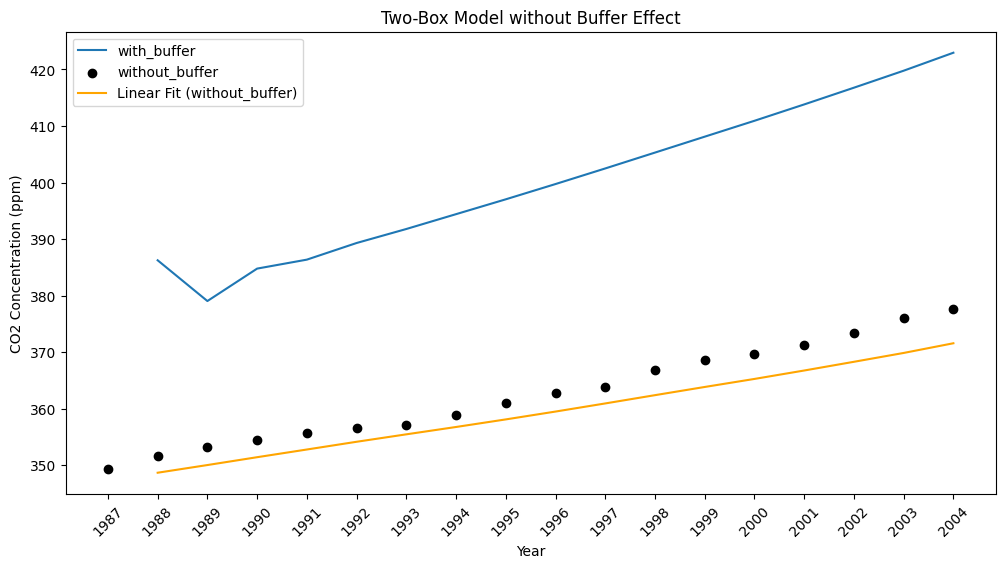

In [395]:
plt.figure(figsize=(12,6))
# 设定起始年份
start_year = 1988

# 找到起始年份在数据中的索引
start_index = np.where(years == start_year)[0][0]

# 截取从 start_year 开始的数据
years_subset = years[start_index:]
N1_subset = N1[start_index:]
C1_subset=C1[start_index:]
plt.plot(years[start_index:],C1_subset, label='with_buffer')
plt.scatter(years, r1, label='without_buffer', color='black', marker='o')
coefficients = np.polyfit(years, N1, 1)
poly = np.poly1d(coefficients)
line_y = poly(years)

# 画出拟合的直线
plt.plot(years[start_index:], N1_subset, label='Linear Fit (without_buffer)', linestyle='-', color='orange')
plt.xticks(np.arange(min(years), max(years)+1, 1), rotation=45)
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Two-Box Model without Buffer Effect')
plt.legend()
plt.show()